In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base=np.load('fit_exercise.npy')

Text(0.5,1,'datos')

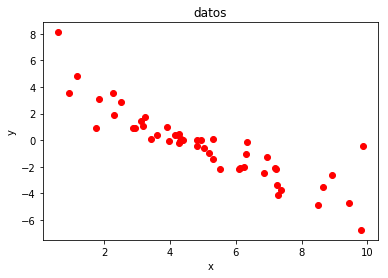

In [20]:
plt.plot(base[0],base[1],'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('datos')


In [7]:
var = np.vstack([base[0,:], np.ones(len(base[0,:]))]).T
m, c = np.linalg.lstsq(var, base[1,:], rcond=None)[0]
m, c

(-0.9821623517930426, 4.57785930375336)

Text(0,0.5,'y')

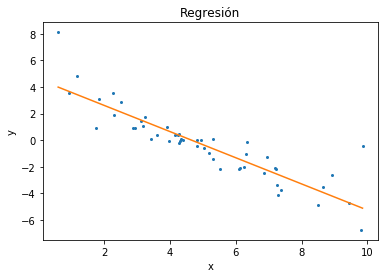

In [24]:
plt.plot(base[0,:], base[1,:], 'o', label='base', markersize=2)
plt.plot(base[0,:], m*base[0,:] + c, label='Regresión lineal')
plt.title('Regresión')
plt.xlabel('x')
plt.ylabel('y')